# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will convert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: 'activity score' - whether or not a user is active

#### 2. What are the predictors/covariates? 

Answer: age, gender, location, and profession

#### 3. What timeframe is this data relevent for?

Answer: January to April of 2015

#### 4. What is the hypothesis?

Answer: We can use age, gender, location, and profession to describe and predict user activity.

## Let's get started with our dataset

#### 1. Create a data dictionary 

Answer: 

Variable | Description | Type of Variable
---| ---| ---
admit | 0 = not admitted 1 = admitted | categorical
gre | candidate's GRE score | continuous 
gpa | candidate's undergraduate program gpa | continuous 
prestige | candidate's undergraduate program ranking (1 = highest prestige) | continuous (could be categorical as well)


In [1]:
import pandas as pd
admit = pd.read_csv('../assets/admissions.csv')
admit.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [24]:
admit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


We would like to explore the association between (GRE, GPA, and undergraduate program ranking) and admission

#### 2. What is the outcome?

Answer: 'admit' - whether or not a candidate was admitted

#### 3. What are the predictors/covariates? 

Answer: 'gre' (the student's GRE score), 'gpa' (the student's GPA in their undergraduate program), and 'prestige' (how well their undraduate program ranks amungst all schools).

#### 4. What timeframe is this data relevent for?

Answer: After doing some digging, I found the original blog post [here](https://stats.idre.ucla.edu/r/dae/logit-regression/).  It looks like the 'hypothetical' data was generated, so it may not be a good descriptor of the real world.  However, if it was sourced from the last semester's admissions, it would only be relevant in describing the admissions from last semester.  We can't assume future students will be the same.

#### 4. What is the hypothesis?

Answer: We can use GRE scores, undergraduate GPA, and undergraduate program ranking to describe and predict students' admissions.

    Using the above information, write a well-formed problem statement. 


### Poblem Statement:
Using the admissions dataset, how can we describe what attributes contribute to a successful student admission.  The attributes we will look at are GRE score, GPA, and college rank, which will help describe our independant variable, 'admit'.

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: To summarize the characteristics of this dataset through descriptive statistics and visualization.

#### 2a. What are the assumptions of the distribution of data? 

Answer: I assume it's normally distributed but I'll have to look at the data to see if that's correct.  My intuition says GRE might skew right, GPA might skew left, but I don't know this yet

#### 2b. How will determine the distribution of your data? 

Answer: Through visualizations

#### 3a. How might outliers impact your analysis? 

Answer: For visualisations, it could skew the curve one way or another.  I'd image GRE scores will be right skewed and GPA scores will be left skewed.  I don't know this yet though.  For descriptive statistics, high and low values will throw off the mean and make it less relevant or less 'descriptive'.  For predictions, high/low values might impact accuracy.

#### 3b. How will you test for outliers? 

Answer: I can visualize the data to see where outliers are.  If the data is corrupt at all, we can remove data points that don't make sense.  

#### 4a. What is colinearity? 

Answer: Colinearity is when two independant variables are highly correlated.  I would guess that all 3 independant variables are highly correlated for this dataset.

#### 4b. How will you test for colinearity? 

Answer: I can take the correlation between all of the features.

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: Using the latest admissions dataset, load the data into a dataframe.  Display a histogram of each feature and the label to get a sense of how the data is distributed.  Provide summary statistics for each column in the data as well.  

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model

In [2]:
%matplotlib inline
import seaborn as sns

In [16]:
sns.distplot?

In [3]:
admit = admit.fillna(0)

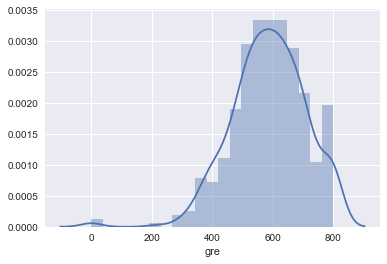

In [27]:
sns.distplot(admit['gre'])

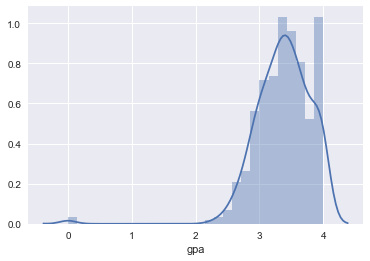

In [32]:
sns.distplot(admit['gpa'])

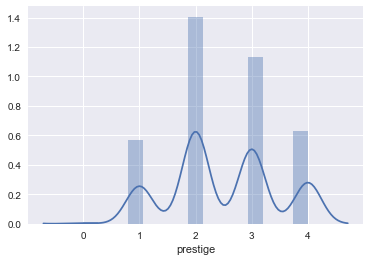

In [35]:
sns.distplot(admit['prestige'])

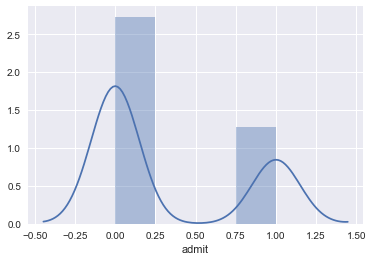

In [36]:
sns.distplot(admit['admit'])

In [28]:
admit['gre'].describe()

count    400.000000
mean     585.100000
std      122.586944
min        0.000000
25%      515.000000
50%      580.000000
75%      660.000000
max      800.000000
Name: gre, dtype: float64

In [29]:
admit['gpa'].describe()

count    400.000000
mean       3.373975
std        0.448889
min        0.000000
25%        3.127500
50%        3.390000
75%        3.670000
max        4.000000
Name: gpa, dtype: float64

In [30]:
admit['prestige'].describe()

count    400.000000
mean       2.480000
std        0.952296
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: prestige, dtype: float64

In [37]:
admit['admit'].describe()

count    400.000000
mean       0.317500
std        0.466087
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: admit, dtype: float64

In [10]:
admitted = admit[admit['admit'] == 1]
len(admitted)

127

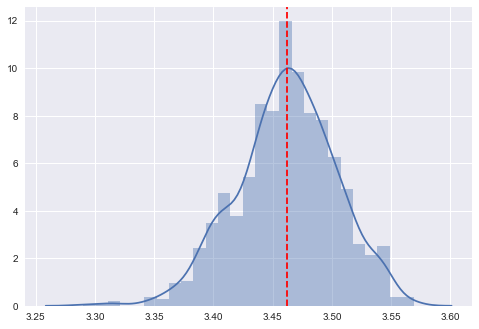

In [6]:
from numpy.random import rand
import numpy as np
import matplotlib.pyplot as plt

admitted = admit[admit['admit'] == 1]
len(admitted)

def mean_gpa_est(data):
    sample_of_sample = [np.random.choice(data['gpa'],size=len(data),replace=True)]
    return np.mean(sample_of_sample)

gpa_means = [mean_gpa_est(admitted) for _ in range(1000)]

fig, ax = plt.subplots()
sns.distplot(gpa_means)
ax.axvline(np.mean(admitted['gpa']),linestyle='--',color='red')

In [13]:
print pd.DataFrame(gpa_means).quantile(.05)
print pd.DataFrame(gpa_means).quantile(.95)

0    3.392248
Name: 0.05, dtype: float64
0    3.530575
Name: 0.95, dtype: float64


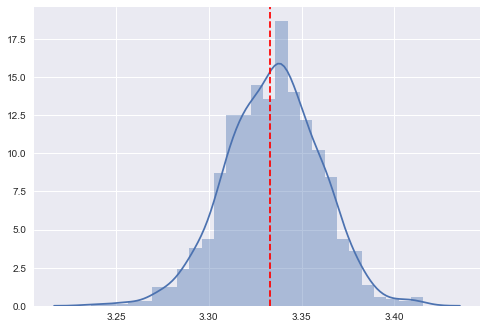

In [14]:
not_admitted = admit[admit['admit'] == 0]
len(not_admitted)
gpa_means = [mean_gpa_est(not_admitted) for _ in range(1000)]

fig, ax = plt.subplots()
sns.distplot(gpa_means)
ax.axvline(np.mean(not_admitted['gpa']),linestyle='--',color='red')

In [15]:
print pd.DataFrame(gpa_means).quantile(.05)
print pd.DataFrame(gpa_means).quantile(.95)

0    3.292747
Name: 0.05, dtype: float64
0    3.375168
Name: 0.95, dtype: float64


2 - Using the admissions dataset, what scoring features are correlated with each other